Python Project Template
 1. Prepare Problem
    a) Load libraries
    b) Load dataset
 2. Summarize Data
  a) Descriptive statistics
  b) Data visualizations
 3. Prepare Data
  a) Data Cleaning
  b) Feature Selection
  c) Data Transforms
 4. Evaluate Algorithms
  a) Split-out validation dataset
  b) Test options and evaluation metric
  c) Spot Check Algorithms
  d) Compare Algorithms
 5. Improve Accuracy
  a) Algorithm Tuning
  b) Ensembles
 6. Finalize Model
  a) Predictions on validation dataset
  b) Create standalone model on entire training dataset
  c) Save model for later use

## 1. Prepare Problem
####  a) Load libraries

In [27]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd
from numpy                         import set_printoptions
from pandas.plotting               import scatter_matrix
from sklearn.model_selection       import train_test_split
from sklearn.preprocessing         import StandardScaler
from sklearn.preprocessing         import MinMaxScaler
from sklearn.model_selection       import KFold
from sklearn.model_selection       import cross_val_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import confusion_matrix
from sklearn.metrics               import accuracy_score
from sklearn.linear_model          import LogisticRegression 
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB
from sklearn.svm                   import SVC
from sklearn.feature_selection     import SelectKBest
from sklearn.feature_selection     import chi2
from sklearn.feature_selection     import RFE
from sklearn.decomposition         import PCA
from sklearn.pipeline              import Pipeline
from sklearn.model_selection       import GridSearchCV
from sklearn.ensemble              import AdaBoostClassifier
from sklearn.ensemble              import GradientBoostingClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.ensemble              import ExtraTreesClassifier

####  a) Load dataset

In [22]:
data_ind = 1 # 1:wine 2:iris

if data_ind == 1:
    data_name    = 'wine'
    data_url     = 'data/wine/wine.data'
    data_header  =  ['class', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
    cols        = ['Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity', 'Hue','OD280/OD315 of diluted wines',
                   'Proline']
    X_sample           ='Color intensity'
    Y_sample           ='OD280/OD315 of diluted wines'
    reorder_col = 1
    oreder      = ['Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline', 'class']
    seed        = 1
    stratify    = True
    test_size   = 0.3
    Feature_Sel = True
    
elif data_ind == 2:
    data_name = 'iris'
    data_url = 'data/iris/iris.data'
    data_header = ['sepal-length','sepal-width','petal-length','petal-width','class']
    cols = ['sepal-length','sepal-width','petal-length','petal-width']
    X_sample ='sepal-length'
    Y_sample='sepal-width'
    reorder_col = 0
    seed = 7
    stratify = False
    test_size = 0.2
    Feature_Sel = False
    
df =  pd.read_csv(data_url,header=None)
df.columns = data_header

# 'class' or y --> end column
if reorder_col == 1:
    df = df[oreder]

df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## 2. Summarize the Dataset
    a) Descriptive statistics
    b) Data Visualization
    

###        2.a   Descriptive statistics
    1. Dimensions of the dataset. 
    2. Peek at the data itself.
    3. Statistical summary of all attributes
    4. Breakdown of the data by the class variable.

In [3]:
print(df.shape)

(178, 14)


In [4]:
df.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
df.groupby('class').size()

class
1    59
2    71
3    48
dtype: int64

### 2.b Data Visualization
    1.  Univariate Plots
    2.  Multivariate Plots

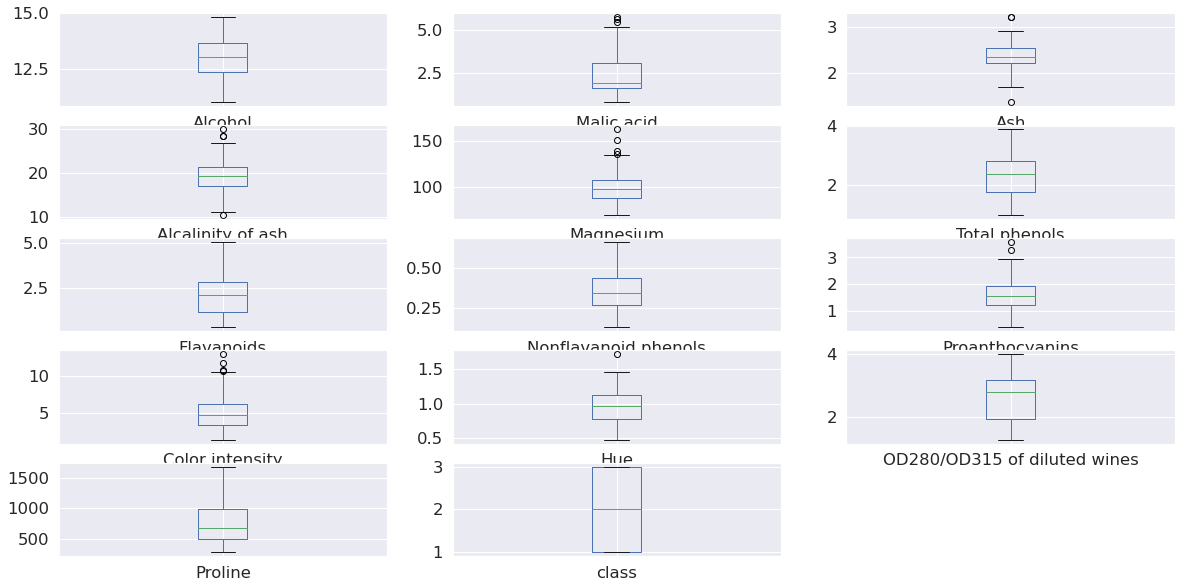

In [18]:
# box and whisker plots
plt.rcParams['figure.figsize'] = (20.0, 10.0)
df.plot(kind='box', subplots=True,layout=(5,int(df.shape[1]/5)+1), sharex=False, sharey=False)
plt.show()

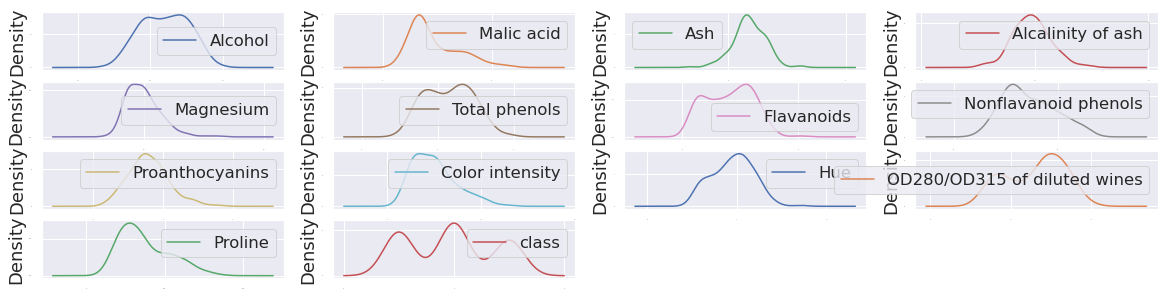

In [20]:
# Density

plt.rcParams['figure.figsize'] = (20.0, 10.0)
df.plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True,fontsize=1)
plt.show()

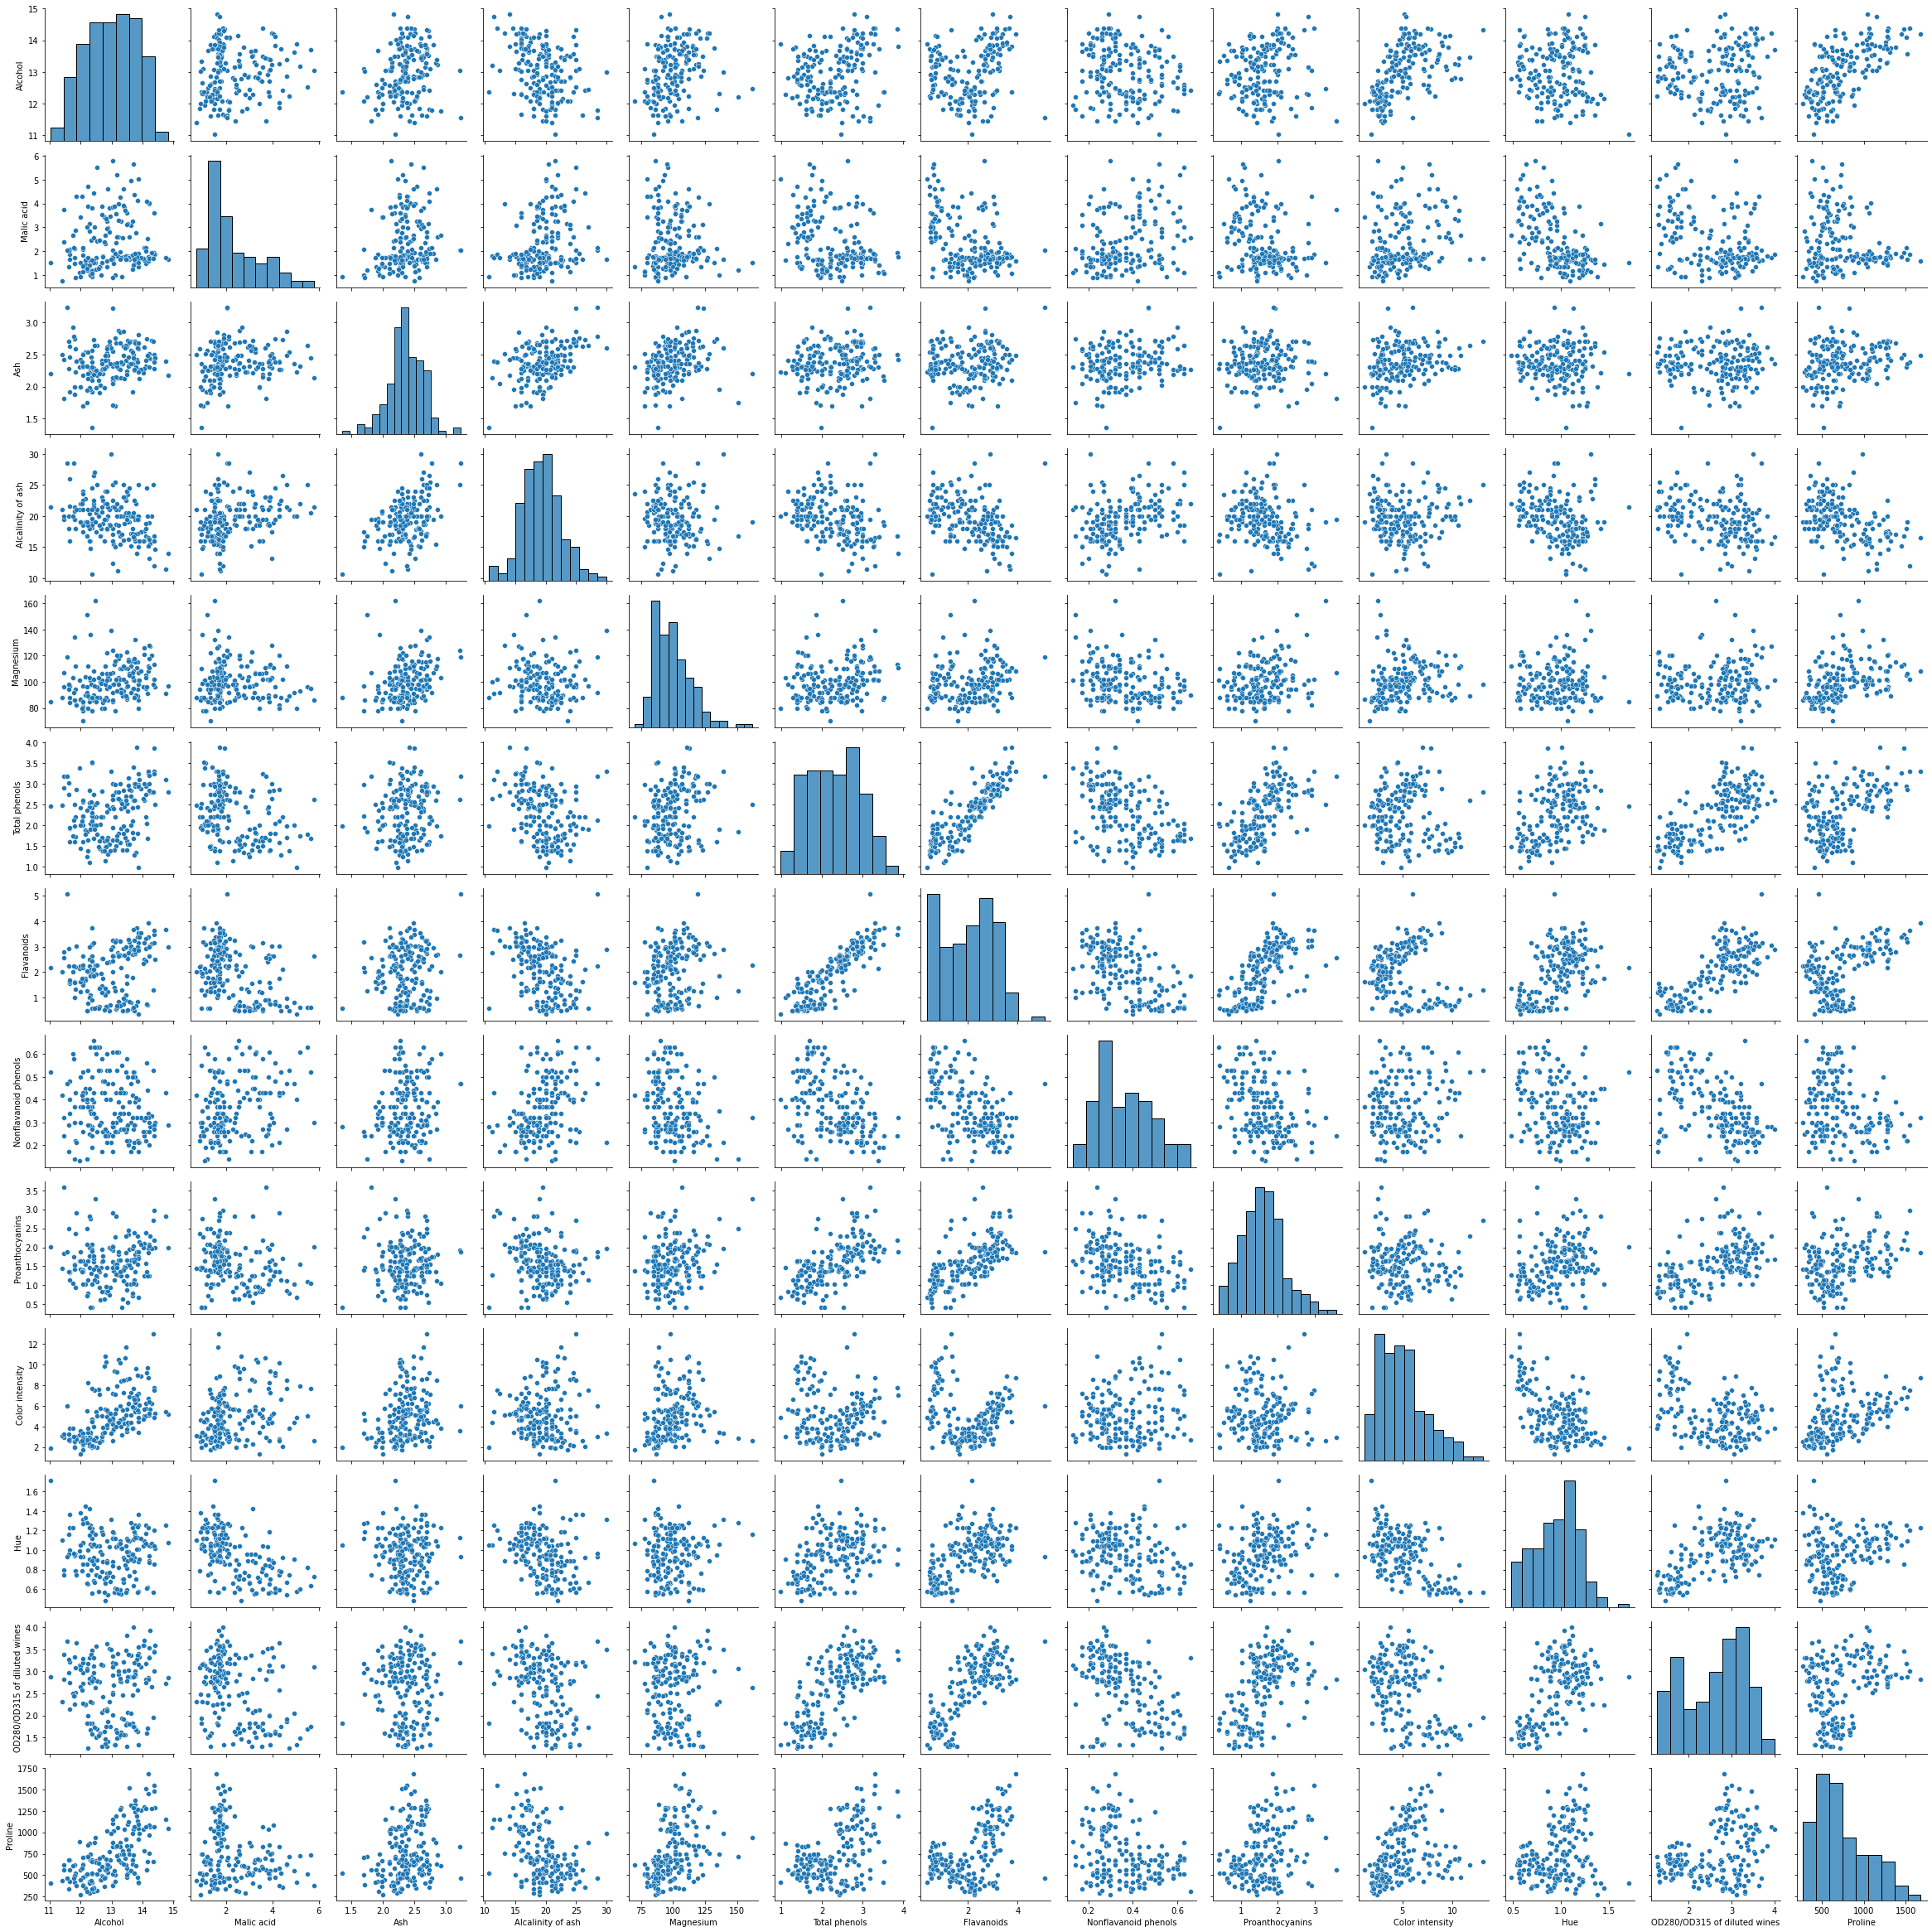

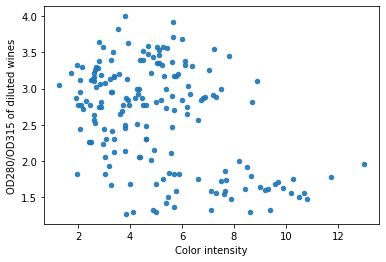

In [9]:
# scatter plot matrix + histograms
#scatter_matrix(df, figsize=(12, 8))
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
#  zoom in
df.plot(kind="scatter", x=X_sample, y=Y_sample,alpha=0.9)
plt.show()


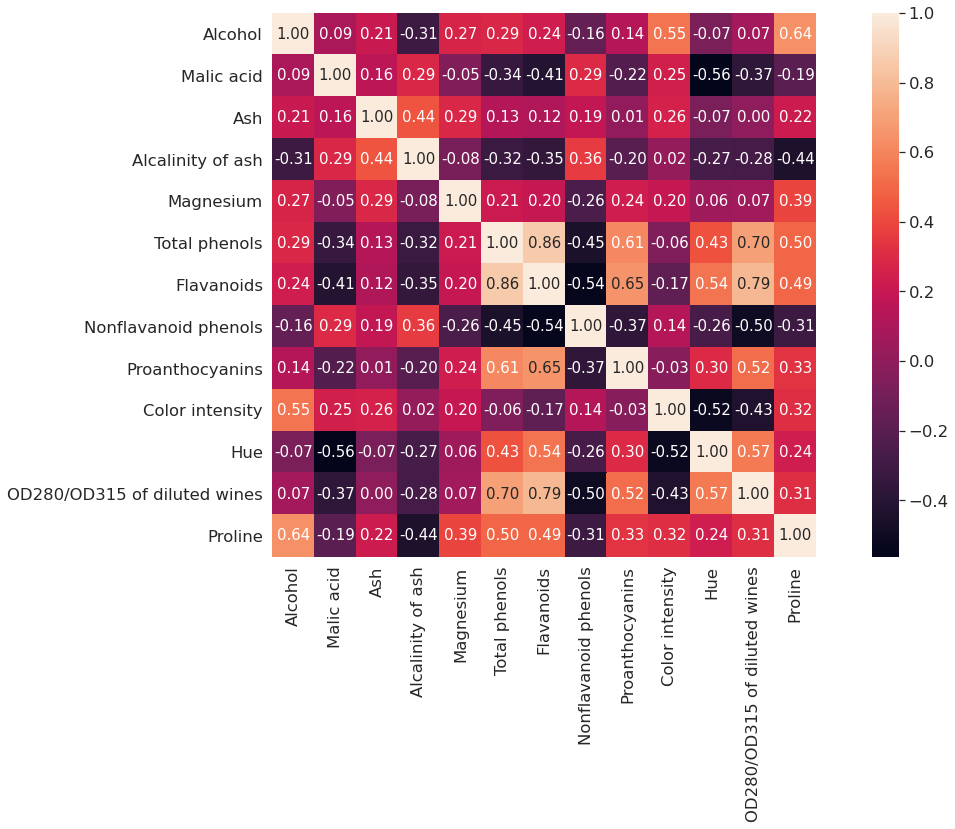

In [10]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,  cbar=True, annot=True,  
                 square=True,fmt='.2f', annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

## 3.  Prepare Data
    a) Data Cleaning
    b) Feature Selection
    c) Data Transforms

## 4. Evaluate Algorithms
    a) Split-out validation dataset
    b) Test options and evaluation metric
    c) Spot Check Algorithms
    d) Compare Algorithms

Univariate Selection Selected Features          : ['Proline' 'OD280/OD315 of diluted wines' 'Flavanoids' 'Color intensity'
 'Alcohol']
Recursive Feature Elimination Selected Features : ['Flavanoids' 'Proline' 'Color intensity' 'Alcohol' 'Hue']
ExtraTreesClassifier feature_importances_       : ['Proline' 'Flavanoids' 'Alcohol' 'Color intensity'
 'OD280/OD315 of diluted wines']
RandomForestClassifier feature_importances_     : ['Proline' 'Flavanoids' 'Color intensity' 'Alcohol'
 'OD280/OD315 of diluted wines']


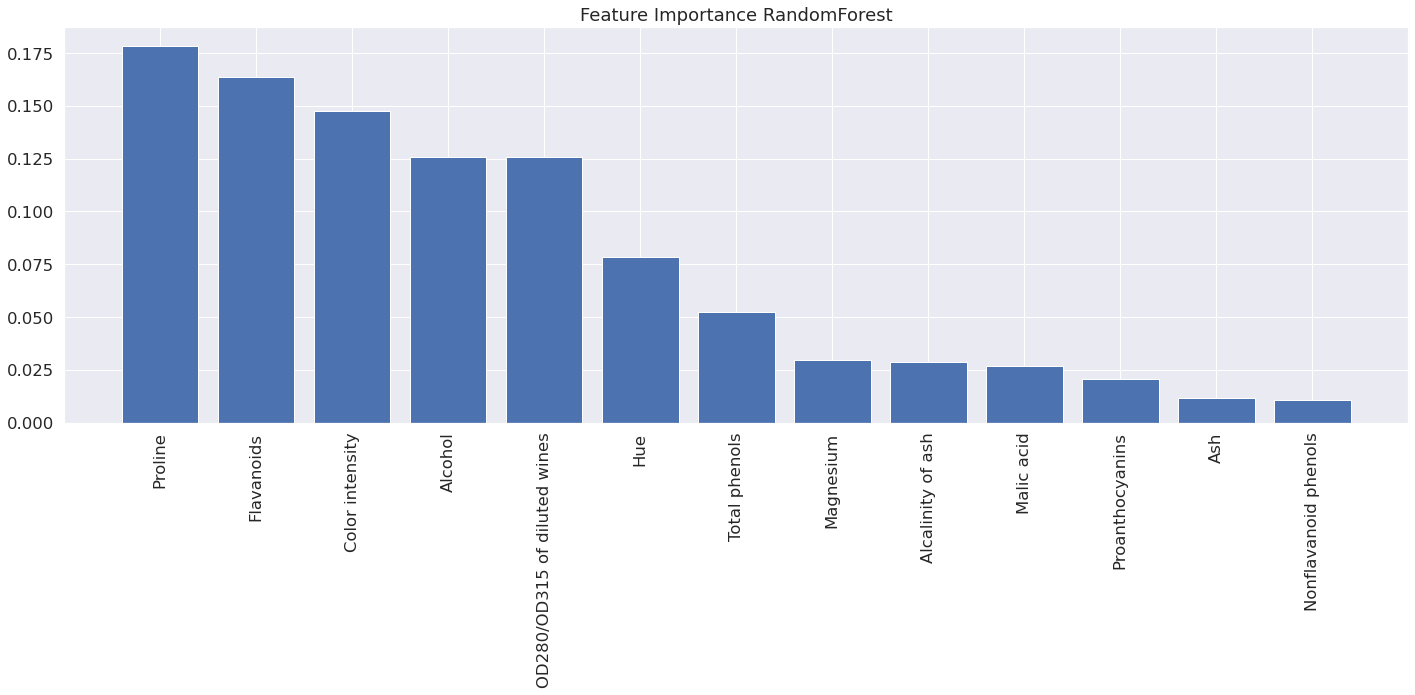

Most voted features are: 
 ['Proline' 'Color intensity' 'Flavanoids' 'Alcohol'
 'OD280/OD315 of diluted wines']


In [32]:
# Split-out validation 

# Providing the class label array y as an argument to 'stratify' ensures 
# that both training and test datasets have the same class proportions as the original dataset.
X, y = df.iloc[:, :-1].values, df['class'].values
stratify_ = None if stratify == False else y
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=test_size,
                                                   random_state=seed, stratify=stratify_)



# Feature Selection
if Feature_Sel == True:
    # standardize the features
    sc = StandardScaler()
    sc_mm = MinMaxScaler(feature_range=(0, 1))
    X_train_mm = sc_mm.fit_transform(X_train)
    X_train_std = sc.fit_transform(X_train)
    #X_test_std = sc.transform(X_test)
    
    Num_of_Features = 5
    
    # Univariate Selection   
    test = SelectKBest(score_func=chi2, k=Num_of_Features)
    fit = test.fit(X_train_mm, y_train)
    # summarize scores
    set_printoptions(precision=3)
    indices_chi2 = np.argsort(-fit.scores_)
    selected_features_names = np.array(cols)[indices_chi2][0:Num_of_Features]
    print('Univariate Selection Selected Features          :',selected_features_names)
    features_chi2 = fit.transform(X)

    
    
    #  Recursive Feature Elimination
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=1)
    fit = rfe.fit(X_train_std, y_train)
    indices_RFE = np.argsort(rfe.ranking_)[0:Num_of_Features]
    selected_features_names = np.array(cols)[indices_RFE]
    print("Recursive Feature Elimination Selected Features :", selected_features_names)

    
    
    # Feature Importance
    model = ExtraTreesClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices_ExTree = np.argsort(-importances)
    selected_features_names = np.array(cols)[indices_ExTree][0:Num_of_Features]
    print('ExtraTreesClassifier feature_importances_       :',selected_features_names)
    
    
    rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
    rnd_clf.fit(X, y)
    importances = rnd_clf.feature_importances_
    indices_RFC = np.argsort(-importances)
    selected_features_names = np.array(cols)[indices_RFC][0:Num_of_Features]
    print("RandomForestClassifier feature_importances_     :", selected_features_names)
         
    feat_labels = np.array(cols)[indices_RFC].tolist()
    plt.title('Feature Importance RandomForest')
    plt.bar(range(X_train.shape[1]),importances[indices_RFC], align='center')
    plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()
     
    # Fnding most voted features
    ind_aggr = np.concatenate([indices_chi2[0:Num_of_Features], indices_RFE[0:Num_of_Features],
                               indices_ExTree[0:Num_of_Features], indices_RFC[0:Num_of_Features]], axis=0)
    unique, counts = np.unique(ind_aggr, return_counts=True)
    c =  np.asarray((unique, counts))
    MV_ind = c[:,c[1,:].argsort()[::-1]][0,0:Num_of_Features]
    print('Most voted features are: \n',np.array(cols)[MV_ind])
    X_selected = X[:, MV_ind]
    
    X_train, X_test, y_train, y_test =train_test_split(X_selected, y,
                                                   test_size=test_size,
                                                   random_state=seed,
                                                   stratify=stratify_)
   

 ###  4.2 Make Predictions

### Dimensionality Reduction (PCA)

In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)


ScaledLR: 0.975000 (0.053359)
ScaledLDA: 0.967308 (0.040078)
ScaledKNN: 0.975000 (0.038188)
ScaledCART: 0.894872 (0.089202)
ScaledNB: 0.950641 (0.054923)
ScaledSVM: 0.975000 (0.053359)


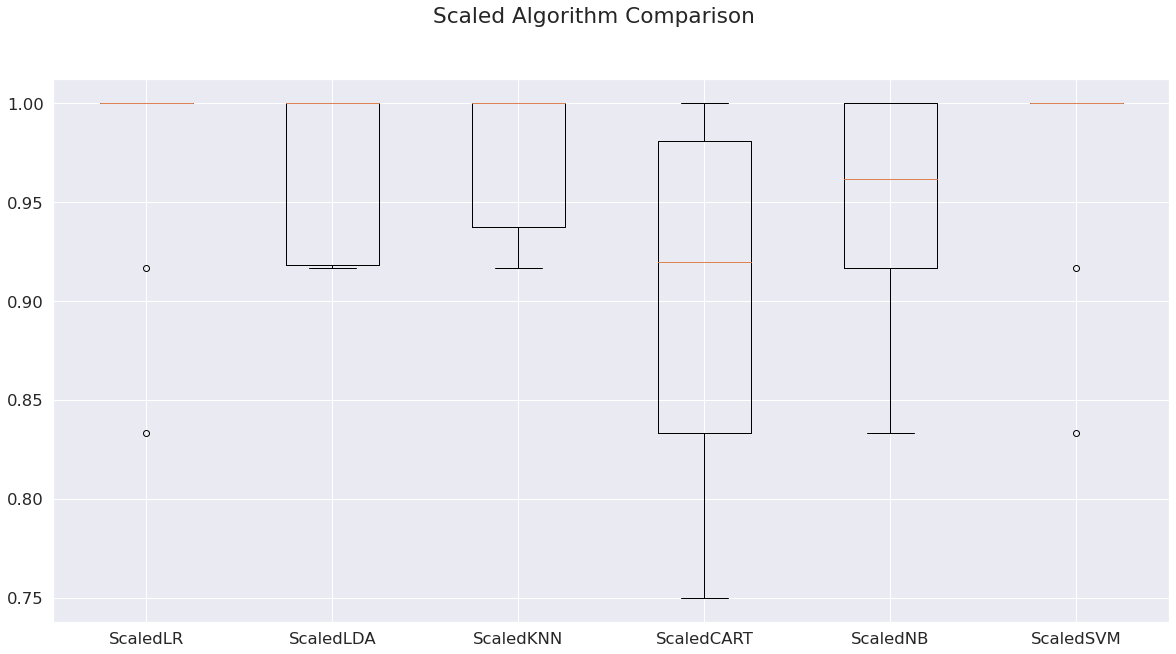

In [33]:
# Standardize the dataset
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='accuracy'
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###  Tuning SVM

In [34]:
# Tune scaled SVM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear','poly','rbf','sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975000 using {'C': 0.1, 'kernel': 'linear'} 

0.975000 (0.038188) with: {'C': 0.1, 'kernel': 'linear'}
0.821795 (0.097208) with: {'C': 0.1, 'kernel': 'poly'}
0.975000 (0.053359) with: {'C': 0.1, 'kernel': 'rbf'}
0.975000 (0.053359) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.958333 (0.067185) with: {'C': 0.3, 'kernel': 'linear'}
0.887179 (0.092013) with: {'C': 0.3, 'kernel': 'poly'}
0.975000 (0.053359) with: {'C': 0.3, 'kernel': 'rbf'}
0.966667 (0.055277) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.958333 (0.055902) with: {'C': 0.5, 'kernel': 'linear'}
0.919872 (0.063020) with: {'C': 0.5, 'kernel': 'poly'}
0.975000 (0.053359) with: {'C': 0.5, 'kernel': 'rbf'}
0.958333 (0.055902) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.966667 (0.055277) with: {'C': 0.7, 'kernel': 'linear'}
0.919872 (0.063020) with: {'C': 0.7, 'kernel': 'poly'}
0.975000 (0.053359) with: {'C': 0.7, 'kernel': 'rbf'}
0.958974 (0.055455) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.966667 (0.055277) with: {'C': 0.9, 'kernel': 'li

### Ensemble Methods

AB: 0.912179 (0.066744)
GBM: 0.935256 (0.049442)
RF: 0.975000 (0.053359)
ET: 0.975000 (0.038188)


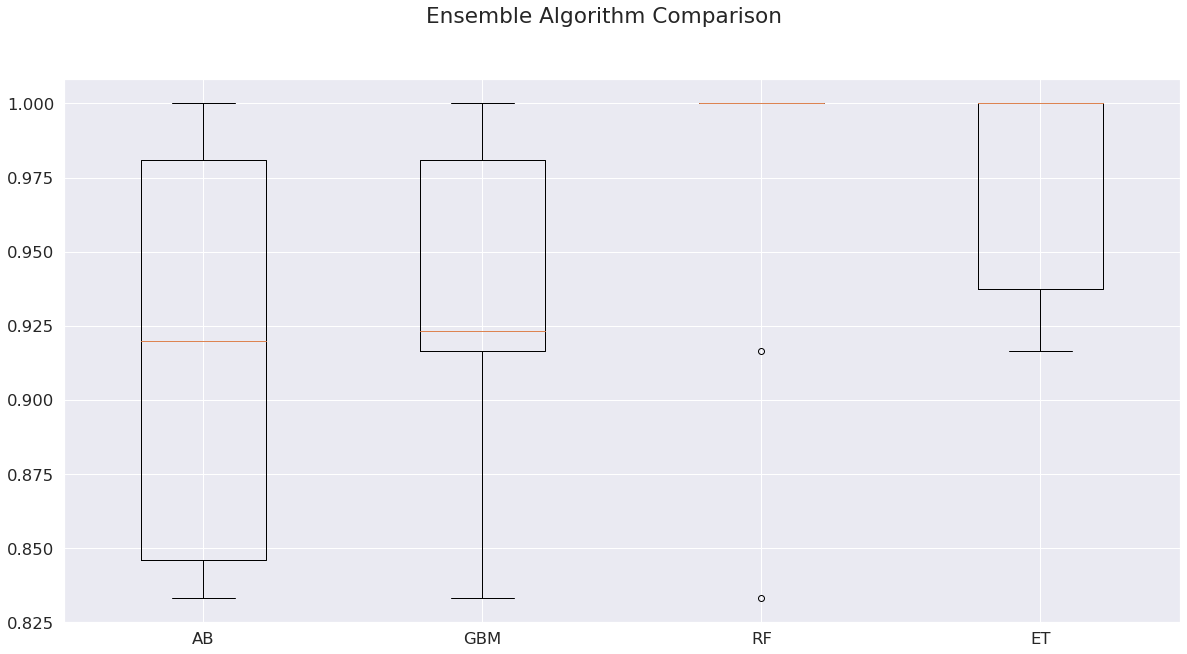

In [35]:
# ensembles

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###  Finalize Model

In [37]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=grid_result.best_params_['C'], kernel=grid_result.best_params_['kernel'])
model.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledTetsX = scaler.transform(X_test)
predictions = model.predict(rescaledTetsX)
print(round(accuracy_score(y_test, predictions),4))

1.0
